----
# SVM classification using sklearn
----

In [1]:
%load_ext autoreload
%autoreload 2

from sklearn.metrics import confusion_matrix as skconfmatrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Set correct working directory
if os.getcwd() != os.path.abspath("../Python"):
    os.chdir("../../Python")

# Import files from /Python directory
from confusion_matrix import confusion_matrix
"""
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr"
})
"""

'\nplt.rcParams.update({\n    "text.usetex": True,\n    "font.family": "cmr"\n})\n'

In [2]:
# Use noisy data sets
noise = True

# Load data sets
trn_data = pd.read_csv(f"../TrainingData/neodata/Training_500_each_run.csv")
tst_data = pd.read_csv(f"../TestData/neodata/Test_500_each_run.csv")

# Separate into data and targets
y_trn = trn_data.pop('target')
X_trn = trn_data

y_tst = tst_data.pop('target')
X_tst = tst_data

## Standardize data (z-norm)

In [3]:
from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()

X_trn = standardizer.fit_transform(X_trn)
X_tst = standardizer.transform(X_tst)

---

# SVM fitting

In [4]:
# Training the SVM, on the 5 dimensional data
from sklearn import svm

clf = svm.SVC( C=1000, decision_function_shape="ovo", gamma=0.01 )
clf.fit(X_trn,y_trn)

SVC(C=1000, decision_function_shape='ovo', gamma=0.01)

# Classifying training data

In [5]:
"""
# Make predictions for the training set
y_hat_trn = clf.predict(X_trn)

#plot the confusion matrix
conf_matrix_trn = skconfmatrix(y_trn,y_hat_trn)
confusion_matrix(conf_matrix_trn, figsize = (10,10),title='Full-SVM 500 each on training set', save_fig_name='Full-SVM 500 each training confusion matrix.pdf',eval_labels = False)

"""

"\n# Make predictions for the training set\ny_hat_trn = clf.predict(X_trn)\n\n#plot the confusion matrix\nconf_matrix_trn = skconfmatrix(y_trn,y_hat_trn)\nconfusion_matrix(conf_matrix_trn, figsize = (10,10),title='Full-SVM 500 each on training set', save_fig_name='Full-SVM 500 each training confusion matrix.pdf',eval_labels = False)\n\n"

# Classifying test data

(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'Full-SVM 500 each on test set : Accuracy 71.429%'}, xlabel='Predicted class', ylabel='True class'>)

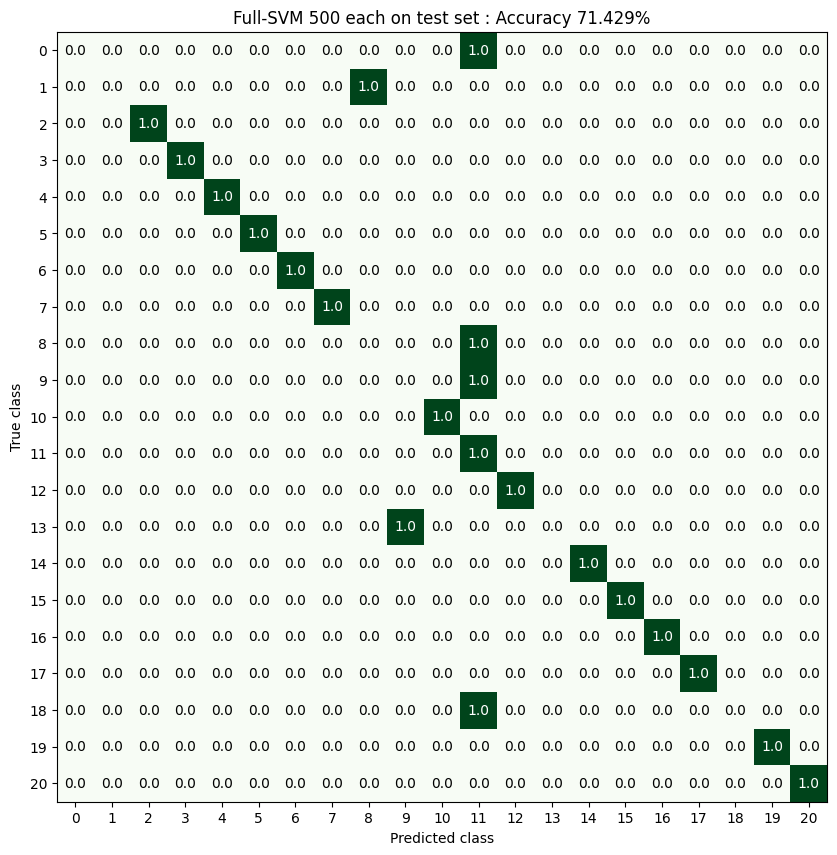

In [6]:
# Make predictions for the test set
y_hat_tst = clf.predict(X_tst)

#plot the confusion matrix
conf_matrix_vld = skconfmatrix(y_tst,y_hat_tst)
confusion_matrix(conf_matrix_vld, figsize = (10,10),title='Full-SVM 500 each on test set', save_fig_name='Full-SVM 500 each test confusion matrix.pdf',eval_labels = False)